# Deep Learning Lab Assignment 1

# Importing Necessory Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

# Part 1 : Linear Regression

## Loading Data

In [2]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Subset

In [3]:
data_1 = data[["GRE Score","Chance of Admit"]]
data_1.head()

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


## Data Visualisation

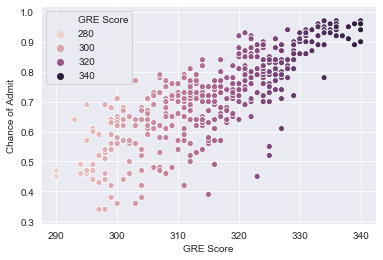

In [4]:
sns.scatterplot(x='GRE Score',y='Chance of Admit',hue="GRE Score",data=data_1)

## Gradient Descent and Cost Function

In [5]:
# means square error
def CostFunction(x,y,m,c,n):
    error = 0 
    y_hat = m*x + c
    error+=sum((y - y_hat)**2)/(2*n)
    return error

# gradient descent for linear regression
def Gradient_Desent(x,y,m,c,error):
    l = 0.000001
    dc= (-2/n) * sum((y - ((m * x) + c)))
    dm= (-2/n) * sum(x * (y - ((m * x) + c)))

    m = m - (l * dm )
    c = c - (l * dc )
    return m,c

In [6]:
#parameters
epochs = 100
m = 0
c = 0
history = []
error = 0

# data division into dependent and independent variab;es
x = (data_1.iloc[:,0].values).reshape(-1,1)
y = (data_1.iloc[:,1].values).reshape(-1,1)
n = len(x)


# epochs / iterations of Gradient Descent

print('Iteration Wise Parameters Value\n')
print('Displaying first and last 20 iterations\n')
print('Error \t\t M \t\t C')
for i in range(epochs):
    error = CostFunction(x,y,m,c,n)    
    m,c = Gradient_Desent(x, y, m, c, error)    
    history.append([error,m,c])
    if i<20 or i>epochs-20:
        print(error,m,c)


Iteration Wise Parameters Value

Displaying first and last 20 iterations

Error 		 M 		 C
[0.27248475] [0.00046158] [1.4487e-06]
[0.17666217] [0.00083038] [2.60493372e-06]
[0.11548872] [0.00112505] [3.52748649e-06]
[0.0764354] [0.0013605] [4.26332784e-06]
[0.05150363] [0.00154862] [4.84998652e-06]
[0.03558711] [0.00169893] [5.31744803e-06]
[0.02542595] [0.00181903] [5.68967084e-06]
[0.01893904] [0.00191498] [5.9857978e-06]
[0.01479777] [0.00199165] [6.22112406e-06]
[0.01215397] [0.00205291] [6.40787048e-06]
[0.01046616] [0.00210186] [6.55580155e-06]
[0.00938866] [0.00214097] [6.67271909e-06]
[0.00870078] [0.00217221] [6.76485679e-06]
[0.00826163] [0.00219718] [6.83719535e-06]
[0.00798128] [0.00221713] [6.89371437e-06]
[0.0078023] [0.00223307] [6.93759356e-06]
[0.00768804] [0.0022458] [6.97137351e-06]
[0.0076151] [0.00225598] [6.99708415e-06]
[0.00756853] [0.00226411] [7.0163474e-06]
[0.0075388] [0.00227061] [7.03045918e-06]
[0.00748631] [0.00229643] [6.71716134e-06]
[0.00748631] [0.002

## Optimal Theta Values after 100 epochs

In [7]:
a=min(history,key=lambda x:x[0])
m,c=a[1],a[2]
print('Optimal Values')
print('Error :',a[0])
print('m value :',m)
print('c value :',c)

Optimal Values
Error : [0.00748631]
m value : [0.00229643]
c value : [6.60257088e-06]


## Convergence Graph

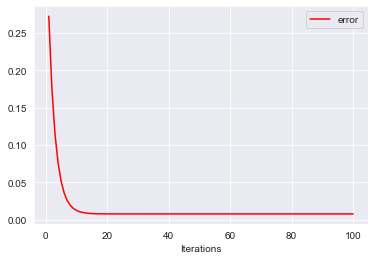

In [8]:
plt.plot(np.linspace(1,100,100),np.array(history)[:,0],color='r',label='error')
plt.xlabel('Iterations')
plt.legend(['error'])

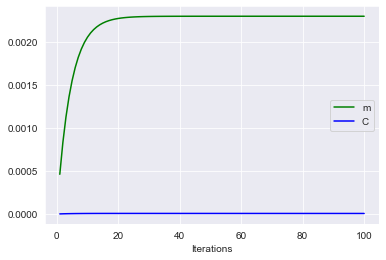

In [9]:
plt.plot(np.linspace(1,100,100),np.array(history)[:,1],color='g',label='m1')
plt.plot(np.linspace(1,100,100),np.array(history)[:,2],color='b',label='c')
plt.xlabel('Iterations')
plt.legend(['m','C'])

## Linear regression fit Plot

Text(0.5, 1.0, 'GRE Score vs Chance of Admit')

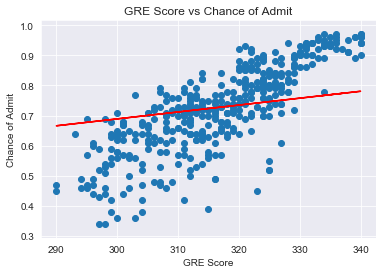

In [10]:
pred=m*x+c
plt.scatter(x,y)
plt.plot(x,pred,color='r')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')

## Prediction for New Data

In [11]:

for i in [300,340]:
    y_pred = m*i + c
    print('GRE score :',i)
    print('Chance of Admission :',y_pred[0],'\n\n')

GRE score : 300
Chance of Admission : 0.6889358111956 


GRE score : 340
Chance of Admission : 0.7807930390122295 




# PART II : Multilinear Regression

## Loading Data

In [12]:
data_2 = data[["GRE Score","CGPA","Chance of Admit"]]
data_2.head()

,GRE Score,CGPA,Chance of Admit
0,337,9.65,0.92
1,324,8.87,0.76
2,316,8.00,0.72
3,322,8.67,0.80
4,314,8.21,0.65


## Data Visualization

Text(0.5, 1.0, 'GRE Score vs CGPA')

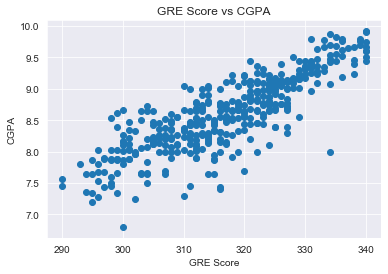

In [13]:
plt.scatter(data_2['GRE Score'],data_2['CGPA'])        #visulization of data
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('GRE Score vs CGPA')

## Data Normalization

In [14]:
for i in data_2.columns[:-1]:
    data_2[i] = ((data[i].values-np.mean(data[i].values))/np.std(data[i].values))

data_2.head()

C:\Users\Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GRE Score,CGPA,Chance of Admit
0,1.762107,1.764818,0.92
1,0.627656,0.455151,0.76
2,-0.070467,-1.005631,0.72
3,0.453126,0.119339,0.80
4,-0.244998,-0.653029,0.65


## Gradient Descent and Cost Function

In [15]:
def CostFunction2(x1,x2,y,m1,m2,c,n):
    error = 0 
    y_hat = m1*x1 + m2*x2 + c
    error+=sum((y - y_hat)**2)/(2*n)
    return error


def Gradient_Descent2(x1,x2,y,m1,m2,c):
    l = 0.01
    dc= (-2/n) * sum((y - ((m1 * x1) + (m2 * x2) + c)))
    dm1= (-2/n) * sum(x1 * (y - ((m1 * x1) + (m2 * x2) + c)))
    dm2= (-2/n) * sum(x2 * (y - ((m1 * x1) + (m2 * x2) + c)))

    m1 = m1 - (l * dm1 )
    m2 = m2 - (l * dm2 )
    c = c - (l * dc )
    return m1,m2,c


In [16]:
# parameters
epochs = 500
m1 = 0
m2 = 0
c = 0
history2 = []
error = 0

# data division into dependent and independent variables
x1 = (data_2.iloc[:,0].values).reshape(-1,1)

x2 = (data_2.iloc[:,1].values).reshape(-1,1)

y = (data_2.iloc[:,2].values).reshape(-1,1)
n = len(x1)


# epochs / iterations of Gradient Descent

print('Iteration Wise Parameters Value\n')
print('Displaying first and last 20 iterations\n')
print('Error \t\t M1 \t\t M2 \t C')
for i in range(epochs):
    error = CostFunction2(x1,x2,y,m1,m2,c,n)    
    m1,m2,c = Gradient_Descent2(x1,x2, y, m1,m2, c)    
    history2.append([error,m1,m2,c])
    
    if i<20 or i>epochs-20:
        print(error,m1,m2,c)
    

Iteration Wise Parameters Value

Displaying first and last 20 iterations

Error 		 M1 		 M2 	 C
[0.27248475] [0.00228633] [0.00248767] [0.014487]
[0.26153568] [0.00448549] [0.00488749] [0.02868426]
[0.25103828] [0.00660068] [0.00720267] [0.04259757]
[0.24097334] [0.00863499] [0.00943631] [0.05623262]
[0.23132254] [0.0105914] [0.01159139] [0.06959497]
[0.22206836] [0.01247278] [0.01367076] [0.08269007]
[0.21319404] [0.01428188] [0.0156772] [0.09552327]
[0.20468357] [0.01602138] [0.01761337] [0.1080998]
[0.19652166] [0.01769382] [0.01948184] [0.12042481]
[0.18869366] [0.01930169] [0.02128507] [0.13250331]
[0.18118559] [0.02084735] [0.02302545] [0.14434025]
[0.17398404] [0.0223331] [0.02470526] [0.15594044]
[0.16707623] [0.02376115] [0.02632673] [0.16730863]
[0.1604499] [0.02513362] [0.02789197] [0.17844946]
[0.15409333] [0.02645257] [0.02940305] [0.18936747]
[0.14799531] [0.02771996] [0.03086192] [0.20006712]
[0.1421451] [0.02893769] [0.0322705] [0.21055278]
[0.13653244] [0.03010761] [0.

## Optimal Theta Values after 500 iterations

In [17]:
m1,m2,c=history2[-1][1],history2[-1][2],history2[-1][3]

print('Optimal Values')
print('Error :',history[-1][0])
print("m1 value : ",m1)
print("m2 value : ",m2)
print("c : ",c)

Optimal Values
Error : [0.00748631]
m1 value :  [0.04062202]
m2 value :  [0.08959735]
c :  [0.72432028]


## Convergence Graph

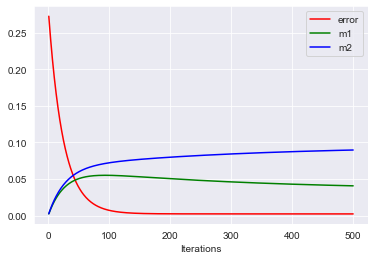

In [18]:
plt.plot(np.linspace(1,500,500),np.array(history2)[:,0],color='r')
plt.plot(np.linspace(1,500,500),np.array(history2)[:,1],color='g',label='m1')
plt.plot(np.linspace(1,500,500),np.array(history2)[:,2],color='b',label='m2')
#plt.plot(np.linspace(1,500,500),np.array(history2)[:,3],color='orange',label='C')
plt.xlabel('Iterations')
plt.legend(['error','m1','m2','C'])

## Prediction and Result Comparison

In [19]:
y_pred = m1*x1[100] + m2*x2 + c
for i in range(10):
    print('GRE Score and CGPA:',x1[i],'&',x2[i],'Actual Answer :',y[i],end=' ')
    print('Predicted Answer :',y_pred[i],'\n')

GRE Score and CGPA: [1.76210664] & [1.76481828] Actual Answer : [0.92] Predicted Answer : [0.9008502] 

GRE Score and CGPA: [0.62765641] & [0.45515126] Actual Answer : [0.76] Predicted Answer : [0.78350751] 

GRE Score and CGPA: [-0.07046681] & [-1.00563118] Actual Answer : [0.72] Predicted Answer : [0.65262528] 

GRE Score and CGPA: [0.4531256] & [0.11933921] Actual Answer : [0.8] Predicted Answer : [0.75341964] 

GRE Score and CGPA: [-0.24499762] & [-0.65302852] Actual Answer : [0.65] Predicted Answer : [0.68421754] 

GRE Score and CGPA: [1.15124883] & [1.24430959] Actual Answer : [0.9] Predicted Answer : [0.854214] 

GRE Score and CGPA: [0.3658602] & [-0.66981912] Actual Answer : [0.75] Predicted Answer : [0.68271315] 

GRE Score and CGPA: [-0.76859003] & [-1.1735372] Actual Answer : [0.68] Predicted Answer : [0.63758134] 

GRE Score and CGPA: [-1.29218245] & [-1.00563118] Actual Answer : [0.5] Predicted Answer : [0.65262528] 

GRE Score and CGPA: [0.54039101] & [0.00180499] Actual 

# Part III : Logistic Regression

## Loading Data

In [20]:
data3=pd.read_csv('heart.csv')
data3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Subset 

In [21]:
print(data3[['age','thalach','target']])

     age  thalach  target
0     63      150       1
1     37      187       1
2     41      172       1
3     56      178       1
4     57      163       1
..   ...      ...     ...
298   57      123       0
299   45      132       0
300   68      141       0
301   57      115       0
302   57      174       0

[303 rows x 3 columns]


## Data / Feature Normalization

In [22]:
X=data3[['age','thalach']].values
y=(data3.iloc[:,-1].values).reshape(-1,1)

X=(X-np.mean(X,0))/np.std(X,0)

print(X[:10,:])

[[ 0.9521966   0.01544279]
 [-1.91531289  1.63347147]
 [-1.47415758  0.97751389]
 [ 0.18017482  1.23989692]
 [ 0.29046364  0.58393935]
 [ 0.29046364 -0.07201822]
 [ 0.18017482  0.1466343 ]
 [-1.1432911   1.0212444 ]
 [-0.26098049  0.54020884]
 [ 0.29046364  1.0649749 ]]


## Data Visualization

Text(0.5, 1.0, 'Age vs Thalach')

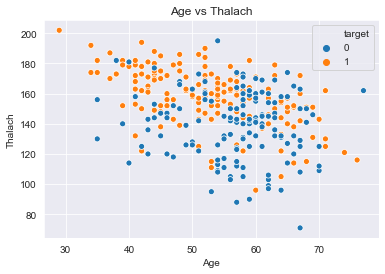

In [23]:
#plt.figure(figsize=(12,8))
sns.scatterplot(data3['age'],data3['thalach'],hue=data3['target'])
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Age vs Thalach')

## Train - Test Data Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train=np.append(np.ones([len(X_train),1]),X_train,axis = 1)
X_test=np.append(np.ones([len(X_test),1]),X_test,axis = 1)

## Gradient Descent , Cost Function and Predict Function

In [25]:
def logreg_cost(theta,x,y):                                
    m,n = x.shape
    cost = -(1 / m) * np.sum((y * np.log((1/(1+np.exp(-x.dot(theta)))))) + ((1 - y) * np.log(1-(1/(1+np.exp(-x.dot(theta)))))))
    return cost

def Gradient_Descent3(iterations,alpha,X_train,y_train):
    n,f = X_train.shape # of Rows and Features
    theta = np.zeros((f,1))
    history3=[]
    for i in range(iterations):
        grad=(1 / n) * np.dot(X_train.T, (1/(1+np.exp(-(X_train.dot(theta))))) - y_train)
        
        cost=logreg_cost(theta,X_train,y_train)

        theta = theta - (alpha*(grad)/len(X_train))
        
        history3.append(([cost]+list(theta.flatten())))
        
    return history3

def predict(data,theta):
    y_hat=1/(1+np.exp(-(np.dot(data,theta))))
    
    y_hat=[1 if i > 0.5 else 0 for i in y_hat]
    
    return y_hat


## Epochs and Optimal Theta Values

In [26]:
# Parameters
iterations = 300
alpha = 0.01


history3= Gradient_Descent3(iterations,alpha,X_train,y_train)


theta=history3[-1][1:]
print('Optimal Cost')
print(history3[-1][0])
print('Optimal Values for theta0,theta1 and theta2')
print(theta)

Optimal Cost
0.6923773926317269
Optimal Values for theta0,theta1 and theta2
[0.0005995753564405085, -0.0015947731580200724, 0.002833153476409542]


## Convergence Graph

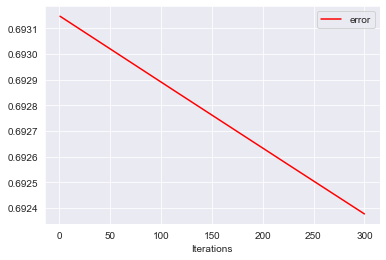

In [27]:
plt.plot(np.linspace(1,300,300),np.array(history3)[:,0],color='r')
plt.xlabel('Iterations')
plt.legend(['error','m1','m2'])

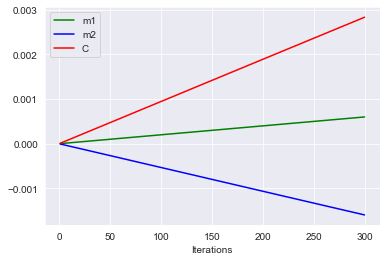

In [28]:
plt.plot(np.linspace(1,300,300),np.array(history3)[:,1],color='g',label='m1')
plt.plot(np.linspace(1,300,300),np.array(history3)[:,2],color='b',label='m2')
plt.plot(np.linspace(1,300,300),np.array(history3)[:,3],color='r',label='m2')
plt.xlabel('Iterations')
plt.legend(['m1','m2','C'])

## Model Performance on Training and Testing Data

In [29]:
from sklearn.metrics import accuracy_score

y_pred1 = predict(X_train,theta)
score1=accuracy_score(y_train,y_pred1)
print('Training Accuracy :',score1)

y_pred2 = predict(X_test,theta)
score2=accuracy_score(y_test,y_pred2)
print('Testing Accuracy :',score2)

Training Accuracy : 0.6745283018867925
Testing Accuracy : 0.7142857142857143


## Comparison with in-built Logistic Regression function

In [30]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_train)
print('Training Accuracy :',accuracy_score(y_train,y_pred))

y_pred = classifier.predict(X_test)
print('Testing Accuracy :',accuracy_score(y_test,y_pred))

Training Accuracy : 0.6933962264150944
Testing Accuracy : 0.7032967032967034


C:\Users\Raj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Thank You